مدل SARIMA یکی از مدل‌های مورد استفاده در تحلیل سری‌های زمانی است که توانایی پیش‌بینی و مدل‌سازی روند‌های مختلف را داراست. این مدل از ترکیب سه مدل مجزا تشکیل می‌شود: ARIMA (مدل متغیرهای خودبازگشتی متقارن متوالی)، تفاوت‌های فصلی (Seasonal Differences) و متغیرهای فصلی خودبازگشتی (Seasonal AR).

مدل SARIMA به منظور مدل‌سازی و پیش‌بینی سری‌های زمانی با الگوهای فصلی و تغییرات فصلی استفاده می‌شود. این مدل از متغیرهای خودبازگشتی متقارن متوالی (AR) برای مدل‌سازی الگوهای خودبازگشتی سری‌های زمانی استفاده می‌کند. علاوه بر این، تفاوت‌های فصلی (Seasonal Differences) برای تسهیل مدل‌سازی الگوهای تغییرات فصلی در سری‌های زمانی به‌کار می‌رود. همچنین، متغیرهای فصلی خودبازگشتی (Seasonal AR) نیز برای مدل‌سازی الگوهای خودبازگشتی فصلی استفاده می‌شوند.
مراحل انجام د بالای سلول هر کد شرح داده شده است
پیاده سازی مدل ساریما نیاز به مشخص شدن هایپرپارامتر های مدل دارد که در گام های بعدی مشخص می‌شوند.(p,d,q)

In [16]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.graph_objects as go

In [17]:
df= pd.read_csv('/home/zahramirzaei/Downloads/SnappTrip_BA_Task.csv')

ساریما یک مدل پیش بینی تک متغیره می‌باشد در نتیجه فقط از متغیر تعداد بلیط استفاده می‌گردد. همچنین به دلیل کم بودن تعداد داده ها سری زمانی به صورت هفتگی بررسی میشود.

In [18]:
#change type of datetime column
df['Flightdate'] = pd.to_datetime(df['Flightdate'])
df_sarima = df.groupby([df.Flightdate.dt.weekofyear.rename('week of year')])['Tickets'].sum().reset_index()

/tmp/ipykernel_3111/2587395243.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_sarima = df.groupby([df.Flightdate.dt.weekofyear.rename('week of year')])['Tickets'].sum().reset_index()


در شکل زیر نمایی کلی از داده مشاهده میشود.قبل از پیاده سازی مدل ساریما بهتر است موارد زیر بررسی شوند که شکل می‌تواند در این مسئله به ما کمک کند: 
جهت کلی داده ها در طول زمان.
هر الگوی فصلی یا تکراری با فرکانس ثابت.
داده های نویز
با نگاه به داده ها میتوان روندی را در آن مشاهده کرد. همچنین داده پرتی وجود ندارد.

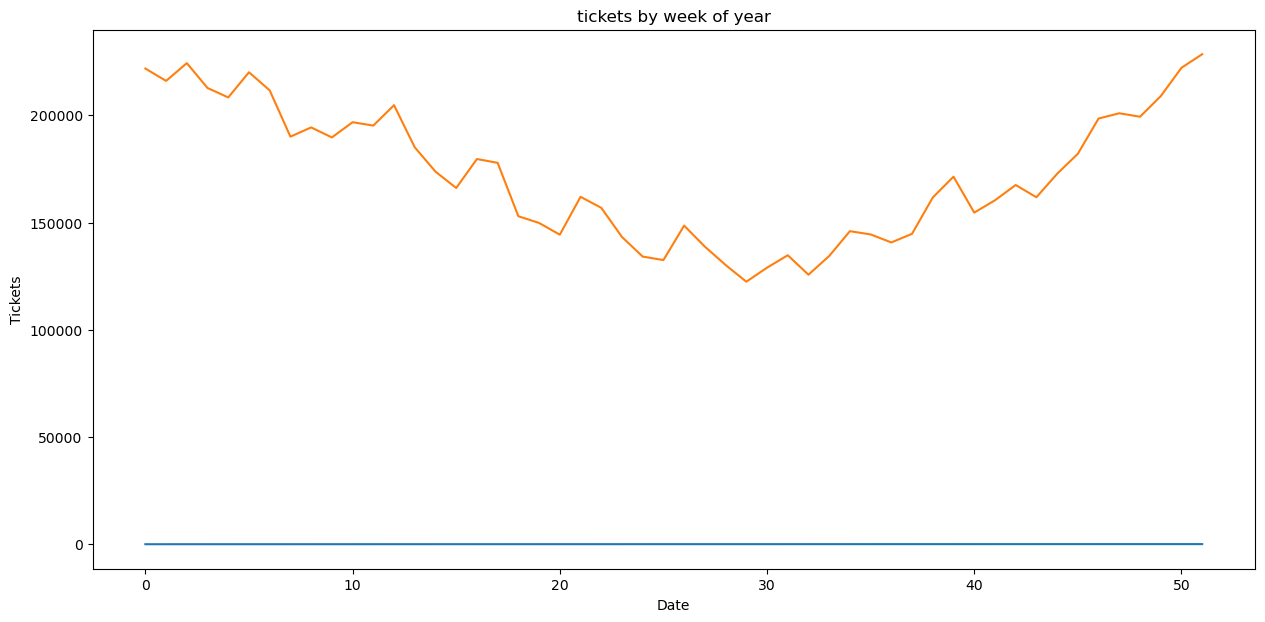

In [19]:
plt.figure(figsize=(15,7))
plt.title("tickets by week of year")
plt.xlabel('Date')
plt.ylabel('Tickets')
plt.plot(df_sarima)
plt.show()

تست دیکی-فولر (Dickey-Fuller) برای تعیین ثابت بودن یا نبودن داده های سری زمانی استفاده می شود. مشابه آزمون t، قبل از آزمون سطح معنی داری تعیین می کنیم و بر اساس p-value حاصل از فرضیه نتیجه می گیریم.

فرضیه صفر: داده ها ثابت نیستند.

فرضیه جایگزین: داده ها ثابت هستند.

برای ثابت بودن داده ها (یعنی رد فرضیه صفر)، آزمون ADF باید p-value کوچکتر از 0.05 باشد. اگر نبود باید تفاوت هر داده با داده قبلی گرفته شود و مجددا تست انجام شود. 

اگر مقدار p بزرگتر از سطح معنی داری باشد، می توان گفت که به احتمال زیاد داده ها ثابت نیستند. 
در این مجموع داده، پس از دوبار انجام گرفتن تفاْضل هرداده از داده قبلی، ازمون دیکی فالر به نتیجه قابل قبولی میرسد.
در ادامه میبینیم که تعداد دفعات تفاضل گرفتن، عدد d در مدل را به ما می‌دهد.

In [20]:
from statsmodels.tsa.stattools import adfuller

# perform the Dickey-Fuller test on the original data
result = adfuller(df_sarima['Tickets'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# perform the Dickey-Fuller test on the first difference of the data
result_diff = adfuller(df_sarima['Tickets'].diff().dropna())
print('ADF Statistic (first difference):', result_diff[0])
print('p-value:', result_diff[1])
print('Critical Values:')
for key, value in result_diff[4].items():
    print('\t%s: %.3f' % (key, value))
    
result_diff = adfuller(df_sarima['Tickets'].diff().dropna().diff().dropna())
print('ADF Statistic (first difference):', result_diff[0])
print('p-value:', result_diff[1])
print('Critical Values:')
for key, value in result_diff[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.8887846064289062
p-value: 0.7916433668791848
Critical Values:
	1%: -3.589
	5%: -2.930
	10%: -2.603
ADF Statistic (first difference): -0.6335316374818128
p-value: 0.8632238380385653
Critical Values:
	1%: -3.589
	5%: -2.930
	10%: -2.603
ADF Statistic (first difference): -3.199450992987811
p-value: 0.020016479901626572
Critical Values:
	1%: -3.606
	5%: -2.937
	10%: -2.607


based on adf test, lag is(d = 2)

In [21]:
df_sarima

,week of year,Tickets
0,1,221832
1,2,216075
2,3,224361
3,4,212757
4,5,208365
5,6,220098
6,7,211650
7,8,190071
8,9,194382
9,10,189705


نمودار ACF (تابع خود همبستگی) برای سری زمانی رسم می‌شود. از تابع plot_acf از ماژول statsmodels.graphics.tsaplots استفاده می‌شود. تعداد لگ‌ها (lags) برابر با 10(به صورت راجی استفاده میشود) در نظر گرفته شده است.

سپس، نمودار PACF (تابع خود همبستگی جزئی) برای سری زمانی رسم می‌شود. از تابع plot_pacf از ماژول statsmodels.graphics.tsaplots استفاده می‌شود. تعداد لگ‌ها (lags) برابر با 10 در نظر گرفته شده است.
به این ترتیب، نمودار ACF و PACF برای سری زمانی query رسم می‌شوند تا الگوهای همبستگی و همبستگی جزئی در داده‌ها مشاهده شوند.
این نمودار ها مقادیر p (acf) و q (pacf) را برای مدل مشخص میکنند.
نمودار ACF (Autocorrelation Function) و PACF (Partial Autocorrelation Function) ابزارهایی هستند که در تحلیل سری زمانی استفاده می‌شوند و برای بررسی و تحلیل خود همبستگی‌ها (autocorrelation) بین مقادیر سری زمانی و مقادیر خود در لاگ زمانی متفاوت استفاده می‌شوند.

1. نمودار ACF:
   در نمودار ACF، همبستگی خود به خود (autocorrelation) بین مقادیر سری زمانی و مقادیر خود در لاگ زمانی متفاوت رسم می‌شود. محور افقی نمودار ACF مقادیر لاگ زمانی را نشان می‌دهد و محور عمودی نشان دهنده میزان همبستگی است. در هر لاگ زمانی، مقدار همبستگی بین مقادیر فعلی و مقادیر خود در لاگ زمانی متفاوت نشان داده می‌شود. اگر مقدار همبستگی نزدیک به 1 یا -1 باشد، نشان دهنده همبستگی قوی مثبت یا منفی است. در صورتی که مقدار همبستگی در حدود صفر باشد، نشانگر عدم همبستگی است.

2. نمودار PACF:
   نمودار PACF میزان همبستگی بین مقادیر سری زمانی و مقادیر خود در لاگ زمانی متفاوت را در نظر می‌گیرد، با از نیروی خارجی متغیر (مقادیر میانی) در مسیر همبستگی حذف شده است. در این نمودار، هر لاگ زمانی نشان دهنده همبستگی مستقیم بین مقادیر فعلی و مقادیر خود در لاگ زمانی متفاوت است. اگر مقدار همبستگی در یک لاگ زمانی خارج از محدوده اطمینان غیرصفر باشد، نشان دهنده همبستگی مستقیم در آن لاگ زمانی است.

تحلیل نمودار ACF و PACF می‌تواند کمک کننده باشد تا الگوها و خصوصیات مختلف سری زمانی را شناسایی کرده و مدل‌های مناسبی برای پیش‌بینی آن انتخاب شود، به عنوان مثال در تحلیل و مدلسازی مدل‌های زمانی مانند ARIMA و SARIMA.


In [22]:
query = df_sarima['Tickets'].diff().dropna().diff().dropna()

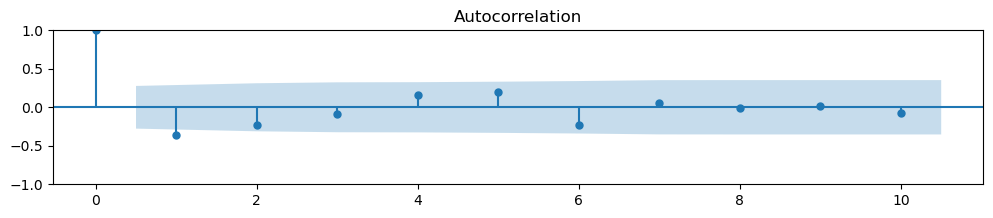

/home/zahramirzaei/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


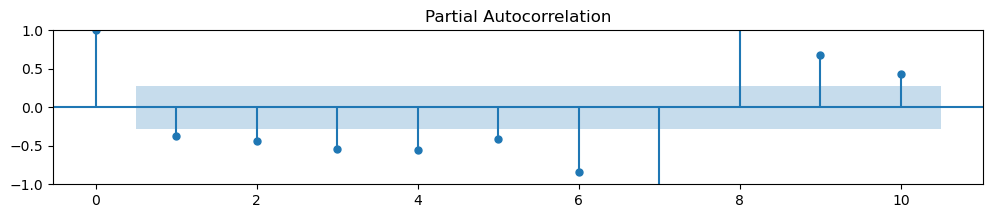

In [23]:
# Plot the ACF
fig, ax = plt.subplots(figsize=(12,2))
plot_acf(query, lags=10, ax=ax)
plt.show()

# Plot the PACF
fig, ax = plt.subplots(figsize=(12,2))
plot_pacf(query, lags=10, ax=ax)
plt.show()

در این قطعه کد، ابتدا با استفاده از تابع seasonal_decompose از ماژول statsmodels.tsa.seasonal سری زمانی query را تجزیه می‌کنیم. استفاده از مدل 'additive' و دوره ماهیانه (period = 6) تعیین شده است. همچنین، پارامتر extrapolate_trend برابر 'freq' قرار می‌گیرد.

با اجرای این خط کد، تجزیه‌ی فصلی روی سری زمانی query انجام می‌شود و متغیر ts_decomp حاوی نتایج تجزیه (افزایشی) می‌شود. متغیر seasonal برابر با مؤلفه فصلی موجود در تجزیه است.

سپس، یک شکل به ابعاد 2 در 1 با استفاده از تابع subplots ایجاد می‌شود. در شکل اول، نمودار ACF برای مؤلفه فصلی رسم می‌شود. از تابع plot_acf از ماژول statsmodels.graphics.tsaplots استفاده می‌شود و تعداد لگ‌ها (lags) برابر با 10 در نظر گرفته شده است. نمودار در محور ax[0] قرار می‌گیرد.

در شکل دوم، نمودار PACF برای مؤلفه فصلی رسم می‌شود. از تابع plot_pacf از ماژول statsmodels.graphics.tsaplots استفاده می‌شود و تعداد لگ‌ها (lags) برابر با 10 در نظر گرفته شده است. نمودار در محور ax[1] قرار می‌گیرد.

به این ترتیب، نمودار ACF و PACF برای مؤلفه فصلی از تجزیه سری زمانی query رسم می‌شوند.
مقدار P فصلی از اولین حرکت  در نمودار ACF در جهت مثبت نمودار که قابل مشاهده باشذ بدست می‌اید و مقدار Q از اولین حرکت در نمودار PACF در جهت منفی مه قابل مشاهده باشد به دست میاسد

In [24]:
ts_decomp = sm.tsa.seasonal_decompose(query, model='additive' ,period = 7, extrapolate_trend='freq')

In [25]:
seasonal = ts_decomp.seasonal

In [26]:
seasonal

2     6284.648896
3    -1146.395929
4    -5008.530768
5     6209.702468
6    -7694.011818
7     2334.966316
8     -980.379165
9     6284.648896
10   -1146.395929
11   -5008.530768
12    6209.702468
13   -7694.011818
14    2334.966316
15    -980.379165
16    6284.648896
17   -1146.395929
18   -5008.530768
19    6209.702468
20   -7694.011818
21    2334.966316
22    -980.379165
23    6284.648896
24   -1146.395929
25   -5008.530768
26    6209.702468
27   -7694.011818
28    2334.966316
29    -980.379165
30    6284.648896
31   -1146.395929
32   -5008.530768
33    6209.702468
34   -7694.011818
35    2334.966316
36    -980.379165
37    6284.648896
38   -1146.395929
39   -5008.530768
40    6209.702468
41   -7694.011818
42    2334.966316
43    -980.379165
44    6284.648896
45   -1146.395929
46   -5008.530768
47    6209.702468
48   -7694.011818
49    2334.966316
50    -980.379165
51    6284.648896
Name: seasonal, dtype: float64

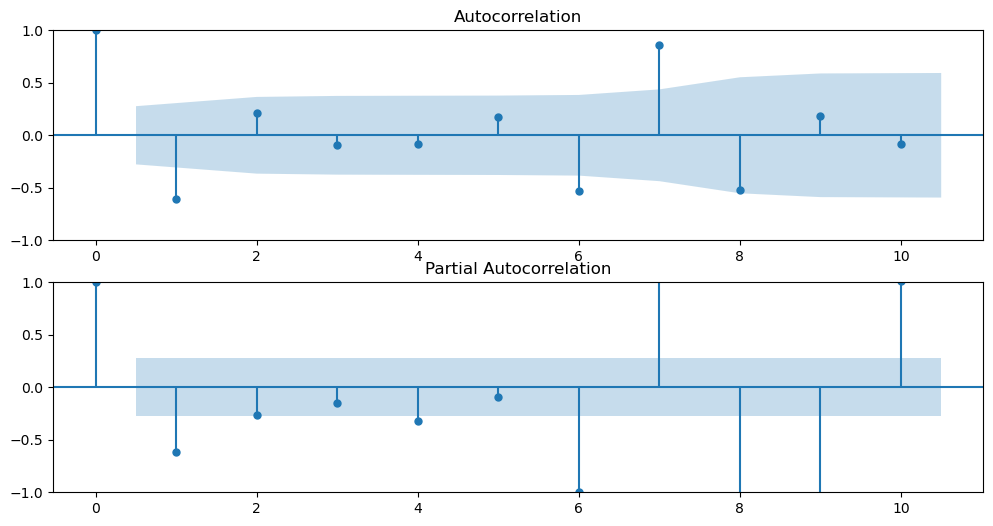

In [27]:
fig , ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(seasonal, ax=ax[0],lags=10)
ax[1] = plot_pacf(seasonal, ax=ax[1],lags=10)

saesonal p = 6,    saesonal q= 7

پس از مشخص شدن هایپر پارامتر ها، داده ها به دو بخش اموزش و تست دسته بندی میشوند.

In [73]:
# df_sarima.set_index('week of year', inplace=True)

# split the data into train and test sets
train = df_sarima.iloc[:-4]
test = df_sarima.iloc[-4:]

In [74]:
x_train = train[["week of year", "Tickets"]].set_index('week of year')
x_test = test[["week of year", "Tickets"]].set_index('week of year')

در این قطعه کد، ابتدا لیست‌های fittedval، residual_list و forecast_values تعریف می‌شوند.

سپس، با استفاده از حلقه for، برای هر مقدار در سری زمانی x_test.Tickets، مدل SARIMAX با پارامترهای my_order و my_seasonal_order تعریف می‌شود. سپس، مدل با استفاده از داده‌های x_train تناسب می‌یابد و مقادیر fittedvalues به لیست fittedval اضافه می‌شود.

سپس، با استفاده از تابع forecast از مدل fit شده و به لیست forecast_values اضافه می‌شوند.

همچنین، برای محاسبه مقادیر باقی‌مانده (residual)، اختلاف بین مقدار و مقدار پیش‌بینی مدل را محاسبه کرده و به لیست residual_list اضافه می‌شود.

در هر مرحله از حلقه، مقدار جدید به x_train اضافه شده و مقدار اول x_test حذف می‌شود. این عملیات به منظور به‌روزرسانی مدل با استفاده از مقادیر جدید در هر مرحله انجام می‌شود.
به این روش پیش بینی که داده قبلی که هر سری زمانی برای دیش بینی اضافه میشود، rolling میگویند.

In [75]:
fittedval = []
residual_list = []
forecast_values = []

p = 3
q = 3
d = 2
n = 12
P = 6
Q = 7
D = 2

for time_step, value in x_test.Tickets.items():
    my_order = (p,d,q)
    my_seasonal_order = (P,D,Q, n)
    model = SARIMAX(x_train, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()
    f = model_fit.fittedvalues
    fittedval.append(f)
    forecast_value = model_fit.forecast()
    forecast_values.append(forecast_value.iloc[0])
    
    residual_list.append(value - forecast_value)
    x_train = x_train.append(pd.Series({'Tickets': value}, name=time_step))
    x_test = x_test.iloc[1:]


/home/zahramirzaei/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/home/zahramirzaei/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/home/zahramirzaei/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/home/zahramirzaei/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.18171D+00    |proj g|=  2.90230D+00

At iterate    5    f=  5.02607D+00    |proj g|=  1.17014D-01

At iterate   10    f=  4.97859D+00    |proj g|=  9.79924D-02

At iterate   15    f=  4.96419D+00    |proj g|=  9.55301D-02

At iterate   20    f=  4.95000D+00    |proj g|=  6.57090D-02

At iterate   25    f=  4.92893D+00    |proj g|=  1.65020D-01

At iterate   30    f=  4.92403D+00    |proj g|=  2.62864D-02

At iterate   35    f=  4.92203D+00    |proj g|=  1.62840D-02

At iterate   40    f=  4.92073D+00    |proj g|=  4.37512D-02

At iterate   45    f=  4.91943D+00    |proj g|=  1.35418D-02


/home/zahramirzaei/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.91755D+00    |proj g|=  2.39828D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20     50     63      1     0     0   2.398D-02   4.918D+00
  F =   4.9175542529867959     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/zahramirzaei/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/tmp/ipykernel_3111/4083404310.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/zahramirzaei/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/home/zahramirzaei/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/home/zahramirzaei/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.31237D+01    |proj g|=  2.68190D+01

At iterate    5    f=  5.27362D+00    |proj g|=  1.21141D-01

At iterate   10    f=  5.25011D+00    |proj g|=  4.24393D-02

At iterate   15    f=  5.22859D+00    |proj g|=  1.71629D-01

At iterate   20    f=  5.12848D+00    |proj g|=  1.80685D-01

At iterate   25    f=  5.10013D+00    |proj g|=  2.04669D-01

At iterate   30    f=  5.09613D+00    |proj g|=  3.90882D-02

At iterate   35    f=  5.09538D+00    |proj g|=  1.54332D-02

At iterate   40    f=  5.09522D+00    |proj g|=  5.91813D-03

At iterate   45    f=  5.09501D+00    |proj g|=  1.49407D-01


/home/zahramirzaei/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  5.09405D+00    |proj g|=  6.67007D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20     50     56      1     0     0   6.670D-02   5.094D+00
  F =   5.0940459859897578     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/zahramirzaei/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/tmp/ipykernel_3111/4083404310.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/zahramirzaei/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/home/zahramirzaei/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/home/zahramirzaei/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23482D+01    |proj g|=  1.80626D+01

At iterate    5    f=  5.25124D+00    |proj g|=  4.29732D-01

At iterate   10    f=  5.17936D+00    |proj g|=  3.89990D-01

At iterate   15    f=  5.15505D+00    |proj g|=  7.73719D-02

At iterate   20    f=  5.14510D+00    |proj g|=  3.62133D-02

At iterate   25    f=  5.14132D+00    |proj g|=  7.27597D-02

At iterate   30    f=  5.13914D+00    |proj g|=  7.59916D-02

At iterate   35    f=  5.13699D+00    |proj g|=  2.50184D-02

At iterate   40    f=  5.13636D+00    |proj g|=  1.51237D-02

At iterate   45    f=  5.13535D+00    |proj g|=  2.50791D-02


/home/zahramirzaei/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  5.13477D+00    |proj g|=  8.24822D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20     50     57      1     0     0   8.248D-03   5.135D+00
  F =   5.1347659079256234     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/zahramirzaei/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/tmp/ipykernel_3111/4083404310.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/zahramirzaei/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/home/zahramirzaei/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/home/zahramirzaei/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.16958D+00    |proj g|=  5.96808D+00

At iterate    5    f=  5.39636D+00    |proj g|=  5.30394D-01

At iterate   10    f=  5.31424D+00    |proj g|=  8.25572D-02

At iterate   15    f=  5.29667D+00    |proj g|=  8.53459D-02

At iterate   20    f=  5.28318D+00    |proj g|=  3.64871D-02

At iterate   25    f=  5.27608D+00    |proj g|=  2.16377D-02

At iterate   30    f=  5.27144D+00    |proj g|=  1.39111D-02

At iterate   35    f=  5.27086D+00    |proj g|=  1.80414D-02

At iterate   40    f=  5.27075D+00    |proj g|=  5.38341D-03

At iterate   45    f=  5.27070D+00    |proj g|=  1.43056D-02


/home/zahramirzaei/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  5.27059D+00    |proj g|=  1.04074D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20     50     59      1     0     0   1.041D-02   5.271D+00
  F =   5.2705852715108339     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/zahramirzaei/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/tmp/ipykernel_3111/4083404310.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



این کد به منظور محاسبه خطای میانگین مربعات (MSE) با استفاده از مقادیر قبلی (lagged values) استفاده میشود. در این کد، یک لیست خالی به نام `y_lag1` ایجاد می‌شود و سپس در حلقه‌ای که بر اساس طول سری `test.Tickets` اجرا می‌شود، مقدار متناظر با اندیس قبلی (`i-1`) از سری `test.Tickets` به لیست `y_lag1` اضافه می‌شود. در نهایت، با استفاده از تابع `np.square()` مقادیر موجود در `residual_list` را مربع می‌کند و با استفاده از `.mean()` میانگین آنها را محاسبه کرده و خطای میانگین مربعات (MSE) را به دست می‌آورد.

In [76]:
y_lag1 =[]
for i in range(len(test.Tickets)):
     y_lag1.append(test.Tickets.iloc[i-1])
mse = (np.square(residual_list)).mean()
mse

1412890222.4128098

In [77]:
fig = go.Figure()
fig.add_trace(go.Scatter(x =test['week of year'] , y = test['Tickets'] , mode = 'lines' , name = 'real'))
fig.add_trace(go.Scatter(x =test['week of year'] , y = y_lag1 , mode = 'lines' , name = '1lag'))
fig.add_trace(go.Scatter(x =test['week of year'] , y = forecast_values , mode = 'lines' , name = 'forcast'))

با توجه به خروجی مدل و ضریب بالای خطا برای مدل، میتوان نتیجه گرفت مدل ساریما مدل مناسبی برای پیش بینی نمیباشد که علت آن حجم کم داده ها بود